# Quantum Volume Demo

Show some basic functionality of the quantum volume experiment.

In [1]:
from qiskit_experiments import BatchExperiment
from qiskit_experiments.library import QuantumVolume
from qiskit import Aer
from qiskit.providers.aer import AerSimulator

# For simulation
from qiskit.test.mock import FakeSydney
backend = AerSimulator.from_backend(FakeSydney())

## Run QV experiment


Analysis Result: QuantumVolume
Analysis Result ID: b114245a-99dc-4477-851e-bdfd581cd6e5
Experiment ID: fa824fd6-5516-4a04-b908-4aa35881b8b3
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 1
- qv success: False
- confidence: 0.9289468300327297
- heavy output probability: [0.75, 0.7421875, 0.68359375, 0.681640625, 0.7265625, 0.70703125, 0.802734375, 0.701171875, 0.7236328125, 0.919921875, 0.6826171875, 0.9560546875, 0.75, 0.6728515625, 0.71875, 0.7890625, 0.638671875, 0.84375, 0.708984375, 0.6884765625, 0.7685546875, 0.7314453125, 0.703125, 0.703125, 0.7607421875, 0.6318359375, 0.701171875, 0.7373046875, 0.7431640625, 0.8271484375, 0.72265625, 0.671875, 0.7353515625, 0.775390625, 0.7314453125, 0.779296875, 0.712890625, 0.7626953125, 0.6884765625, 0.703125, 0.701171875, 0.7666015625, 0.6708984375, 0.7939453125, 0.625, 0.88671875, 0.634765625, 0.7265625, 0.7431640625, 0.80859375, 0.744140625, 0.7275390625

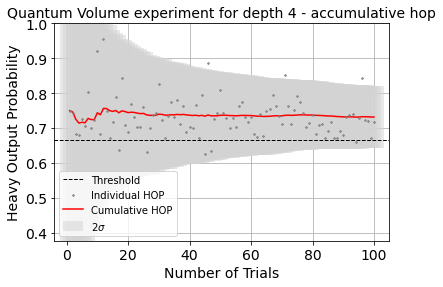

In [2]:
qubits = 4 # Can use specific qubits. for example [2, 4, 7]

qv_exp = QuantumVolume(qubits)
# Transpile options like optimization_level affect only the real device run and not the simulation run
# Run options affect both simulation and real device runs
qv_exp.set_transpile_options(optimization_level=3)
expdata = qv_exp.run(backend)
expdata.block_for_results()
# View result data
print(expdata.analysis_results(0))
display(expdata.figure(0))

### Adding trials

More trials will reduce the error bars to allow passing the threshold (beside the error bars - Quantum Volume experiment must have at least 100 trials to consider successful). <br>
In case you want to add less than 100 additional trials, you can modify the amount of trials added before re-running the experiment.


Analysis Result: QuantumVolume
Analysis Result ID: b114245a-99dc-4477-851e-bdfd581cd6e5
Experiment ID: fa824fd6-5516-4a04-b908-4aa35881b8b3
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 1
- qv success: False
- confidence: 0.9289468300327297
- heavy output probability: [0.75, 0.7421875, 0.68359375, 0.681640625, 0.7265625, 0.70703125, 0.802734375, 0.701171875, 0.7236328125, 0.919921875, 0.6826171875, 0.9560546875, 0.75, 0.6728515625, 0.71875, 0.7890625, 0.638671875, 0.84375, 0.708984375, 0.6884765625, 0.7685546875, 0.7314453125, 0.703125, 0.703125, 0.7607421875, 0.6318359375, 0.701171875, 0.7373046875, 0.7431640625, 0.8271484375, 0.72265625, 0.671875, 0.7353515625, 0.775390625, 0.7314453125, 0.779296875, 0.712890625, 0.7626953125, 0.6884765625, 0.703125, 0.701171875, 0.7666015625, 0.6708984375, 0.7939453125, 0.625, 0.88671875, 0.634765625, 0.7265625, 0.7431640625, 0.80859375, 0.744140625, 0.7275390625

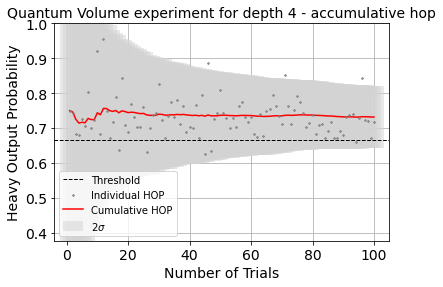

In [3]:
qv_exp.set_experiment_options(trials=60)
expdata2 = qv_exp.run(backend, experiment_data=expdata)
expdata2.block_for_results()
# View result data
print(expdata2.analysis_results(0))
display(expdata2.figure(0))

### Using another backed for simulation


Analysis Result: QuantumVolume
Analysis Result ID: 8c57ebae-0337-4287-b753-049c7547f81b
Experiment ID: 9f813bab-d175-44c0-ab54-7a72ddd25405
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 1
- qv success: False
- confidence: 0.836945800299169
- heavy output probability: [0.9091796875, 0.7607421875, 0.6435546875, 0.642578125, 0.6689453125, 0.787109375, 0.720703125, 0.7314453125, 0.68359375, 0.67578125, 0.689453125, 0.71875, 0.66796875, 0.794921875, 0.6826171875, 0.611328125, 0.7626953125, 0.6806640625, 0.76953125, 0.7626953125, 0.7109375, 0.6494140625, 0.7080078125, 0.673828125, 0.7666015625, 0.7763671875, 0.7392578125, 0.72265625, 0.7724609375, 0.791015625, 0.669921875, 0.697265625, 0.75390625, 0.7236328125, 0.7109375, 0.693359375, 0.73828125, 0.751953125, 0.666015625, 0.7275390625, 0.6279296875, 0.7314453125, 0.734375, 0.6865234375, 0.619140625, 0.6796875, 0.705078125, 0.6962890625, 0.697265625, 0.806

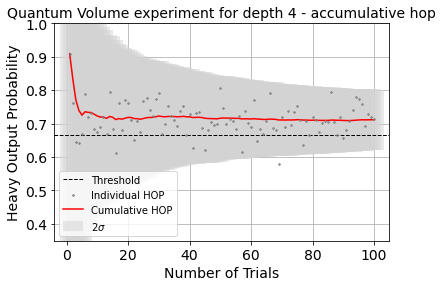

In [4]:
another_simulation_backend = Aer.get_backend('aer_simulator_matrix_product_state')
qv_exp2 = QuantumVolume(qubits, simulation_backend=another_simulation_backend)
expdata3 = qv_exp2.run(backend)
expdata3.block_for_results()
# View result data
print(expdata3.analysis_results(0))
display(expdata3.figure(0))

### Running Quantum Volume using a batch experiment

Run the experiment with an increasing number of qubits to check what is the maximum Quantum Volume for the specific device. To reach the real system's Quantum Volume, one must run more trials and additional enhancements might be required (readout error mitigation for example).

In [9]:
exps = [QuantumVolume(i) for i in range(3,7)]
for exp in exps:
    exp.set_experiment_options(trials=250)
batch_exp = BatchExperiment(exps)
batch_exp.set_transpile_options(optimization_level=3)
batch_expdata = batch_exp.run(backend)
expdata.block_for_results()

Extracting the maximum Quantum Volume.

In [19]:
qv = [batch_expdata.component_experiment_data(i).analysis_results(-1).data()['quantum volume'] 
      for i in range(batch_exp.num_experiments)]
print("Max quantum volume is: " + str(max(qv)))

Max quantum volume is: 32


In [ ]:
for i in range(batch_exp.num_experiments):
    print(batch_expdata.component_experiment_data(i).analysis_results(-1))
    display(batch_expdata.component_experiment_data(i).figure(0))